## Tutorial 2 Examples

## UK Baby Names 👶 (1996-2021)

## About The Dataset

### Introduction

<i>Baby name statistics are compiled from first names recorded when live births are registered in England and Wales as part of civil registration, a legal requirement.
The statistics are based only on live births which occurred in the calendar year, as there is no public register of stillbirths.</i>

<i>Babies born in England and Wales to women whose usual residence is outside England and Wales are included in the statistics for England and Wales as a whole, but excluded from any sub-division of England and Wales.
The statistics are based on the exact spelling of the name given on the birth certificate. Grouping names with similar pronunciation would change the rankings. Exact names are given so users can group if they wish.</i>

<i>The dataset contains records of around 16k boy names and 22k girl names.</i>

Further information from: 
https://www.kaggle.com/datasets/johnsmith44/uk-baby-names-1996-2021

Two notebooks will be used to analyse this data, one for the boys and one for the girls.

In [1]:
# import libraries needed

import pandas as pd
import numpy as np

import re # regular expressions
import glob

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Analysing Girls Names

### Import the data

In [2]:
# Check the start and end of the file for any issues
!head data/UKGirlNames1996-2021.csv

In [3]:
!tail data/UKGirlNames1996-2021.csv

The first line seems to be the column headings, the data is comma separated. There are no unexpected rows at the end.


In [4]:
# read the girls names file 
names_df = pd.read_csv('data/UKGirlNames1996-2021.csv')

In [5]:
# Examine the names
names_df

,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
0,A'Idah,NaN,NaN,NaN,NaN,4686.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A'Isha,5581.0,3.0,NaN,NaN,2458.0,10.0,NaN,NaN,4763.0,...,NaN,NaN,NaN,NaN,3142.0,4.0,NaN,NaN,NaN,NaN
2,A'Ishah,4634.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5765.0,...,3912.0,3.0,3225.0,4.0,3142.0,4.0,NaN,NaN,NaN,NaN
3,A'Niyah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aa'Idah,4634.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21953,Zynah,3961.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4763.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21954,Zyra,2341.0,11.0,2449.0,10.0,4001.0,5.0,2901.0,8.0,4063.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21955,Zyrah,5581.0,3.0,4535.0,4.0,NaN,NaN,NaN,NaN,4763.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21956,Zysha,4634.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# List some rows
names_df.head(n=3)

,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
0,A'Idah,NaN,NaN,NaN,NaN,4686.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A'Isha,5581.0,3.0,NaN,NaN,2458.0,10.0,NaN,NaN,4763.0,...,NaN,NaN,NaN,NaN,3142.0,4.0,NaN,NaN,NaN,NaN
2,A'Ishah,4634.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5765.0,...,3912.0,3.0,3225.0,4.0,3142.0,4.0,NaN,NaN,NaN,NaN


In [7]:
# Last 2 records
names_df.tail(2)

,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
21956,Zysha,4634.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21957,Zyva,2711.0,9.0,2449.0,10.0,3541.0,6.0,3985.0,5.0,4063.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# See what type of data it contains
names_df.dtypes

Name           object
2021 Rank     float64
2021 Count    float64
2020 Rank     float64
2020 Count    float64
2019 Rank     float64
2019 Count    float64
2018 Rank     float64
2018 Count    float64
2017 Rank     float64
2017 Count    float64
2016 Rank     float64
2016 Count    float64
2015 Rank     float64
2015 Count    float64
2014 Rank     float64
2014 Count    float64
2013 Rank     float64
2013 Count    float64
2012 Rank     float64
2012 Count    float64
2011 Rank     float64
2011 Count    float64
2010 Rank     float64
2010 Count    float64
2009 Rank     float64
2009 Count    float64
2008 Rank     float64
2008 Count    float64
2007 Rank     float64
2007 Count    float64
2006 Rank     float64
2006 Count    float64
2005 Rank     float64
2005 Count    float64
2004 Rank     float64
2004 Count    float64
2003 Rank     float64
2003 Count    float64
2002 Rank     float64
2002 Count    float64
2001 Rank     float64
2001 Count    float64
2000 Rank     float64
2000 Count    float64
1999 Rank 

In [9]:
# And their values
names_df.values

array([["A'Idah", nan, nan, ..., nan, nan, nan],
       ["A'Isha", 5581.0, 3.0, ..., nan, nan, nan],
       ["A'Ishah", 4634.0, 4.0, ..., nan, nan, nan],
       ...,
       ['Zyrah', 5581.0, 3.0, ..., nan, nan, nan],
       ['Zysha', 4634.0, 4.0, ..., nan, nan, nan],
       ['Zyva', 2711.0, 9.0, ..., nan, nan, nan]], dtype=object)

There are clearly a lot of issues:
- lots of NaNs
- year values are in the heading

On the plus side the values all appear to be numbers.

## Handling Missing Data

In [10]:
# any missing name values
names_df[names_df['Name'].isnull()]

,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count


The names seem complete, the missing data just seems to be in the count and rank columns. The extent of the missing data is that little can be done to try and do anything other than drop those rows. This could be due to names becoming popular one year, but then not another year. 

In [11]:
# drop any missing data
names_df.dropna(how='any')

,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
38,Aaisha,1569.0,19.0,1846.0,15.0,1497.0,20.0,1436.0,22.0,1411.0,...,804.0,28.0,816.0,27.0,955.0,22.0,1287.0,14.0,1646.0,10.0
39,Aaishah,2942.0,8.0,1846.0,15.0,2643.0,9.0,2901.0,8.0,1733.0,...,2416.0,6.0,1970.0,8.0,2407.0,6.0,1365.0,13.0,2350.0,6.0
58,Aaliya,1402.0,22.0,1352.0,23.0,1063.0,32.0,1314.0,25.0,1021.0,...,1033.0,20.0,1675.0,10.0,1823.0,9.0,1543.0,11.0,1522.0,11.0
59,Aaliyah,132.0,385.0,125.0,397.0,141.0,352.0,128.0,406.0,129.0,...,268.0,147.0,429.0,70.0,320.0,112.0,283.0,128.0,319.0,111.0
84,Aamina,1785.0,16.0,1127.0,29.0,1095.0,31.0,920.0,40.0,870.0,...,804.0,28.0,842.0,26.0,817.0,27.0,1015.0,20.0,1296.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21865,Zofia,318.0,148.0,298.0,156.0,288.0,171.0,237.0,212.0,240.0,...,2746.0,5.0,1805.0,9.0,1697.0,10.0,1450.0,12.0,2350.0,6.0
21866,Zoha,788.0,46.0,617.0,62.0,737.0,52.0,826.0,45.0,968.0,...,1594.0,11.0,2189.0,7.0,3142.0,4.0,2411.0,6.0,1914.0,8.0
21871,Zohra,2711.0,9.0,2615.0,9.0,1497.0,20.0,4684.0,4.0,2502.0,...,1688.0,10.0,1473.0,12.0,1697.0,10.0,2411.0,6.0,2096.0,7.0
21890,Zoya,185.0,277.0,162.0,312.0,200.0,247.0,201.0,258.0,248.0,...,728.0,32.0,816.0,27.0,724.0,32.0,1045.0,19.0,1031.0,19.0


In [12]:
# Note the commands above haven't actually changed the Dataframe
names_df.head(6)

,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
0,A'Idah,NaN,NaN,NaN,NaN,4686.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A'Isha,5581.0,3.0,NaN,NaN,2458.0,10.0,NaN,NaN,4763.0,...,NaN,NaN,NaN,NaN,3142.0,4.0,NaN,NaN,NaN,NaN
2,A'Ishah,4634.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5765.0,...,3912.0,3.0,3225.0,4.0,3142.0,4.0,NaN,NaN,NaN,NaN
3,A'Niyah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aa'Idah,4634.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Aa'Isha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# remove missing data permanately
names_df = names_df.dropna(how='any')

In [14]:
names_df.head()

,Name,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
38,Aaisha,1569.0,19.0,1846.0,15.0,1497.0,20.0,1436.0,22.0,1411.0,...,804.0,28.0,816.0,27.0,955.0,22.0,1287.0,14.0,1646.0,10.0
39,Aaishah,2942.0,8.0,1846.0,15.0,2643.0,9.0,2901.0,8.0,1733.0,...,2416.0,6.0,1970.0,8.0,2407.0,6.0,1365.0,13.0,2350.0,6.0
58,Aaliya,1402.0,22.0,1352.0,23.0,1063.0,32.0,1314.0,25.0,1021.0,...,1033.0,20.0,1675.0,10.0,1823.0,9.0,1543.0,11.0,1522.0,11.0
59,Aaliyah,132.0,385.0,125.0,397.0,141.0,352.0,128.0,406.0,129.0,...,268.0,147.0,429.0,70.0,320.0,112.0,283.0,128.0,319.0,111.0
84,Aamina,1785.0,16.0,1127.0,29.0,1095.0,31.0,920.0,40.0,870.0,...,804.0,28.0,842.0,26.0,817.0,27.0,1015.0,20.0,1296.0,14.0


## Analysing the Data

In [15]:
# Produce some quick stats
names_df.describe

<bound method NDFrame.describe of            Name  2021 Rank  2021 Count  2020 Rank  2020 Count  2019 Rank  \
38       Aaisha     1569.0        19.0     1846.0        15.0     1497.0   
39      Aaishah     2942.0         8.0     1846.0        15.0     2643.0   
58       Aaliya     1402.0        22.0     1352.0        23.0     1063.0   
59      Aaliyah      132.0       385.0      125.0       397.0      141.0   
84       Aamina     1785.0        16.0     1127.0        29.0     1095.0   
...         ...        ...         ...        ...         ...        ...   
21865     Zofia      318.0       148.0      298.0       156.0      288.0   
21866      Zoha      788.0        46.0      617.0        62.0      737.0   
21871     Zohra     2711.0         9.0     2615.0         9.0     1497.0   
21890      Zoya      185.0       277.0      162.0       312.0      200.0   
21914  Zulaikha     2341.0        11.0     2615.0         9.0     2458.0   

       2019 Count  2018 Rank  2018 Count  2017 Rank  

In [16]:
names_df.describe()

,2021 Rank,2021 Count,2020 Rank,2020 Count,2019 Rank,2019 Count,2018 Rank,2018 Count,2017 Rank,2017 Count,...,2000 Rank,2000 Count,1999 Rank,1999 Count,1998 Rank,1998 Count,1997 Rank,1997 Count,1996 Rank,1996 Count
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,...,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,1509.664887,133.825768,1452.599466,132.636849,1410.117490,140.929907,1344.778371,146.636849,1306.839786,154.196929,...,1029.795060,163.439252,1050.361148,168.839119,1099.936582,173.471963,1133.872497,175.852470,1181.489987,177.421228
std,1320.406284,329.246204,1247.945821,326.914392,1227.381214,355.680793,1147.555471,370.388132,1120.079385,396.675043,...,796.051795,551.936965,813.633567,593.299180,879.810555,621.631493,898.239120,628.332001,944.967985,642.468585
min,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,...,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000
25%,466.000000,12.000000,458.500000,12.000000,458.000000,13.000000,450.250000,14.000000,434.500000,15.000000,...,397.000000,12.000000,398.000000,11.000000,401.000000,11.000000,404.000000,10.000000,408.000000,9.000000
50%,1161.000000,29.000000,1127.000000,29.000000,1063.000000,32.000000,1047.000000,33.500000,1002.000000,36.000000,...,864.000000,25.500000,900.000000,24.000000,898.000000,24.000000,926.000000,23.000000,974.000000,21.000000
75%,2201.000000,92.000000,2163.000000,88.500000,2040.000000,92.000000,1977.000000,96.750000,1911.000000,100.750000,...,1475.000000,80.000000,1557.000000,81.000000,1571.000000,78.000000,1666.000000,78.000000,1755.000000,79.000000
max,5581.000000,3649.000000,5493.000000,3640.000000,5591.000000,4082.000000,5666.000000,4598.000000,5765.000000,5204.000000,...,3912.000000,7534.000000,3900.000000,9038.000000,3848.000000,9628.000000,3824.000000,7745.000000,3795.000000,7087.000000


This produces stats for each year, but does mean you have to examine the data year by year.

For example, look at 2021's data

In [17]:
# 2021
names_df[['2021 Count', '2021 Rank']]

,2021 Count,2021 Rank
38,19.0,1569.0
39,8.0,2942.0
58,22.0,1402.0
59,385.0,132.0
84,16.0,1785.0
...,...,...
21865,148.0,318.0
21866,46.0,788.0
21871,9.0,2711.0
21890,277.0,185.0


In [18]:
# then 2020...
names_df[['2020 Count', '2020 Rank']]

,2020 Count,2020 Rank
38,15.0,1846.0
39,15.0,1846.0
58,23.0,1352.0
59,397.0,125.0
84,29.0,1127.0
...,...,...
21865,156.0,298.0
21866,62.0,617.0
21871,9.0,2615.0
21890,312.0,162.0


This would get tedious if we want to look at all the years!

What we want to do is to unpivot the dataframe from a wide to long format

In [19]:
names2_df = pd.melt(names_df, id_vars="Name")
names2_df

,Name,variable,value
0,Aaisha,2021 Rank,1569.0
1,Aaishah,2021 Rank,2942.0
2,Aaliya,2021 Rank,1402.0
3,Aaliyah,2021 Rank,132.0
4,Aamina,2021 Rank,1785.0
...,...,...,...
77891,Zofia,1996 Count,6.0
77892,Zoha,1996 Count,8.0
77893,Zohra,1996 Count,7.0
77894,Zoya,1996 Count,19.0


The dataframe now has the years in the variable column, but we have two types of values here, the count and rank. Given the format is "Year Type", where Type is either "Rank" or "Count" we can use the split function to separate the values.

In [20]:
names2_df[['Year','Type']] = names2_df['variable'].str.split(' ', expand = True)
names2_df

,Name,variable,value,Year,Type
0,Aaisha,2021 Rank,1569.0,2021,Rank
1,Aaishah,2021 Rank,2942.0,2021,Rank
2,Aaliya,2021 Rank,1402.0,2021,Rank
3,Aaliyah,2021 Rank,132.0,2021,Rank
4,Aamina,2021 Rank,1785.0,2021,Rank
...,...,...,...,...,...
77891,Zofia,1996 Count,6.0,1996,Count
77892,Zoha,1996 Count,8.0,1996,Count
77893,Zohra,1996 Count,7.0,1996,Count
77894,Zoya,1996 Count,19.0,1996,Count


In [21]:
names2_df.dtypes

Name         object
variable     object
value       float64
Year         object
Type         object
dtype: object

In [22]:
# We may want to treat year as a number later, so convert to an integer
names2_df['Year'] = names2_df['Year'].astype(str).astype(int)

In [23]:
names2_df.dtypes

Name         object
variable     object
value       float64
Year          int64
Type         object
dtype: object

In [24]:
names2_df.head()

,Name,variable,value,Year,Type
0,Aaisha,2021 Rank,1569.0,2021,Rank
1,Aaishah,2021 Rank,2942.0,2021,Rank
2,Aaliya,2021 Rank,1402.0,2021,Rank
3,Aaliyah,2021 Rank,132.0,2021,Rank
4,Aamina,2021 Rank,1785.0,2021,Rank


In [25]:
# the variable column is no longer needed
names2_df.drop('variable', axis=1, inplace=True)
names2_df.head()

,Name,value,Year,Type
0,Aaisha,1569.0,2021,Rank
1,Aaishah,2942.0,2021,Rank
2,Aaliya,1402.0,2021,Rank
3,Aaliyah,132.0,2021,Rank
4,Aamina,1785.0,2021,Rank


In [26]:
# Check what data now looks like
names2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77896 entries, 0 to 77895
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    77896 non-null  object 
 1   value   77896 non-null  float64
 2   Year    77896 non-null  int64  
 3   Type    77896 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [27]:
# Produce some quick stats
names2_df.describe()

,value,Year
count,77896.000000,77896.000000
mean,656.341507,2008.500000
std,913.483824,7.500048
min,1.000000,1996.000000
25%,31.000000,2002.000000
50%,218.000000,2008.500000
75%,993.000000,2015.000000
max,9628.000000,2021.000000


## Visualising the data

Now we have reshaped the dataframe into a more acceptable format, you would normally complete the notebook with some visualisations.

There will not be enough time to cover appropriate visualisations in this tutorial.

Let's just look at some things to avoid!

Text(0, 0.5, 'Value')

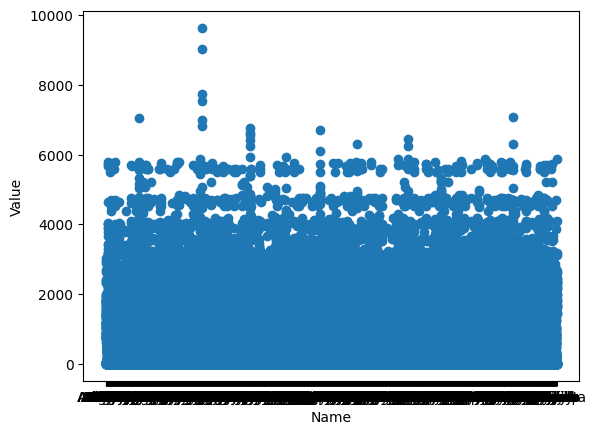

In [28]:
# A scatterplot is often a good way to show patterns in the data, but please do not submit anything like this:
plt.scatter(names2_df['Name'],names2_df['value'])
plt.xlabel('Name')
plt.ylabel('Value')

Hopefully you can see this is totally meaningless. Trying to show all of the data in one plot just becomes a mess and it would only work if you were working with very small datasets. If you can not see the values in either label, such as the names here (xlabel), then rethink what you are trying to illustrate.

### Reshaping the plot data

Some further reshaping is needed before visualising the data. There are two sorts of values in the value attributes, which should be separated out.

One approach is to separate out the different values into two separate datasframes, then merge on name and year. Alternatively, we could have "melted" the two types of values when first reshaping the data. We will go for the first option here.

In [29]:
# separate out the Rank values
namesRank_df= names2_df[names2_df["Type"]=='Rank']
namesRank_df= namesRank_df.rename(columns={"value" : "Rank"})
namesRank_df.drop('Type', axis=1, inplace=True)
namesRank_df

,Name,Rank,Year
0,Aaisha,1569.0,2021
1,Aaishah,2942.0,2021
2,Aaliya,1402.0,2021
3,Aaliyah,132.0,2021
4,Aamina,1785.0,2021
...,...,...,...
76393,Zofia,2350.0,1996
76394,Zoha,1914.0,1996
76395,Zohra,2096.0,1996
76396,Zoya,1031.0,1996


In [30]:
# then separate out the count values
namesCount_df= names2_df[names2_df["Type"]=='Count']
namesCount_df = namesCount_df.rename(columns={"value" : "Count"})
namesCount_df.drop('Type', axis=1, inplace=True)
namesCount_df

,Name,Count,Year
1498,Aaisha,19.0,2021
1499,Aaishah,8.0,2021
1500,Aaliya,22.0,2021
1501,Aaliyah,385.0,2021
1502,Aamina,16.0,2021
...,...,...,...
77891,Zofia,6.0,1996
77892,Zoha,8.0,1996
77893,Zohra,7.0,1996
77894,Zoya,19.0,1996


In [31]:
# merge the datasets on name and year
namesAll_df = namesCount_df.merge(namesRank_df, how='inner', on=['Name','Year'])
namesAll_df

,Name,Count,Year,Rank
0,Aaisha,19.0,2021,1569.0
1,Aaishah,8.0,2021,2942.0
2,Aaliya,22.0,2021,1402.0
3,Aaliyah,385.0,2021,132.0
4,Aamina,16.0,2021,1785.0
...,...,...,...,...
38943,Zofia,6.0,1996,2350.0
38944,Zoha,8.0,1996,1914.0
38945,Zohra,7.0,1996,2096.0
38946,Zoya,19.0,1996,1031.0


In [32]:
namesAll_df.describe()

,Count,Year,Rank
count,38948.000000,38948.000000,38948.000000
mean,164.927134,2008.500000,1147.755880
std,486.381188,7.500096,974.357011
min,3.000000,1996.000000,1.000000
25%,15.000000,2002.000000,408.000000
50%,33.000000,2008.500000,899.000000
75%,97.000000,2015.000000,1628.000000
max,9628.000000,2021.000000,5876.000000


Text(0, 0.5, 'Count')

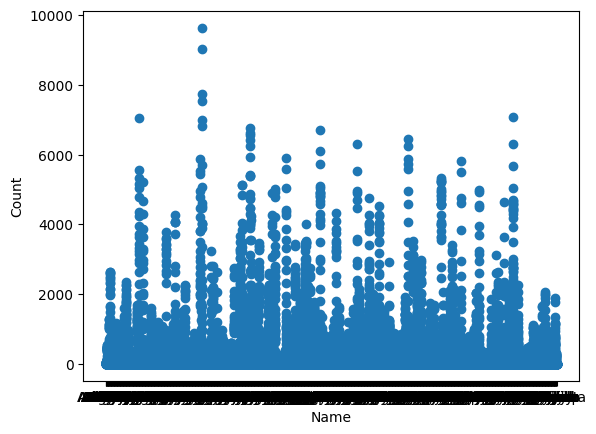

In [33]:
plt.scatter(namesAll_df['Name'],namesAll_df['Count'])
plt.xlabel('Name')
plt.ylabel('Count')

Still very unreadable, really you need to look at a subset of the data, such as last 10 years worth of data and certain rankings - we could use the 25% percentile value produced by the describe() command.

In [34]:
namesSubset_df = namesAll_df[namesAll_df['Year'] >= 2012]
namesSubset_df = namesSubset_df[namesSubset_df['Rank'] < 371]
namesSubset_df

,Name,Count,Year,Rank
3,Aaliyah,385.0,2021,132.0
14,Abigail,494.0,2021,105.0
16,Ada,1058.0,2021,44.0
30,Aida,138.0,2021,343.0
36,Aisha,414.0,2021,121.0
...,...,...,...,...
14964,Zara,886.0,2012,71.0
14968,Zaynab,146.0,2012,332.0
14974,Zoe,620.0,2012,91.0
14975,Zofia,137.0,2012,350.0


Text(0, 0.5, 'Count')

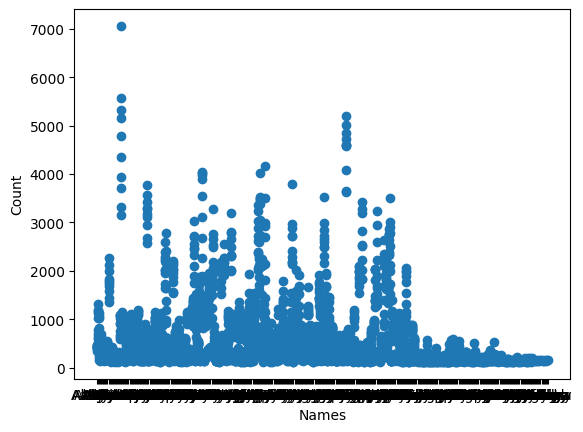

In [35]:
plt.scatter(namesSubset_df['Name'],namesSubset_df['Count'])
plt.xlabel('Names')
plt.ylabel('Count')

Still not good, scatter plots are not really working here. Lets produce some summary data, such as a count of names by year.

In [36]:
plot_df = namesSubset_df.groupby(['Year'], group_keys=False).sum()
plot_df = plot_df.reset_index()
plot_df

,Year,Name,Count,Rank
0,2012,AaliyahAbbieAbigailAimeeAishaAlanaAleenaAleksa...,219088.0,61944.0
1,2013,AaliyahAaminahAbbieAbigailAdaAimeeAishaAlanaAl...,206910.0,61848.0
2,2014,AaliyahAaminahAbbieAbigailAdaAimeeAishaAlanaAl...,204457.0,60339.0
3,2015,AaliyahAaminahAbbieAbigailAdaAgnesAimeeAishaAl...,203777.0,60115.0
4,2016,AaliyahAbigailAdaAgnesAishaAlanaAlaynaAlbaAlee...,200174.0,58832.0
5,2017,AaliyahAbigailAdaAishaAlanaAlaynaAlbaAleenaAle...,190065.0,57561.0
6,2018,AaliyahAbigailAdaAishaAlanaAlaynaAlbaAleenaAle...,180263.0,57230.0
7,2019,AaliyahAbigailAdaAishaAlanaAlaynaAlbaAleenaAle...,172875.0,54616.0
8,2020,AaliyahAbigailAdaAishaAlanaAlaynaAlbaAleenaAle...,162151.0,55276.0
9,2021,AaliyahAbigailAdaAidaAishaAlanaAlaynaAlbaAleen...,163544.0,53787.0


Text(0, 0.5, 'Count')

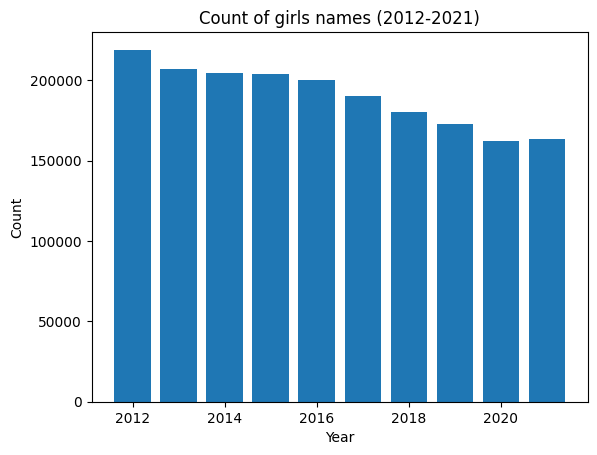

In [37]:
plt.bar(plot_df['Year'],plot_df['Count'])
plt.title("Count of girls names (2012-2021)")
plt.xlabel('Year')
plt.ylabel('Count')

At least the data is now readable, but is it interesting/meaningful? As with the boys dataset, the count has dropped slightly over the years, this could lead to an investigation of whether this trend has been the same over a longer time period.

The moral of the story is that some thought needs to be given on what would be interesting to show from the data. One investigation could be to take the top 10 names in a particular year (2021) and look at how popular the name has been in the last 10 years.

In [38]:
# find the top 10 names in 2021
namesTop10_df = namesSubset_df.loc[(namesSubset_df['Rank'] <= 10) & 
                                 (namesSubset_df['Year'] == 2021)]
namesTop10_df

,Name,Count,Year,Rank
110,Amelia,3164.0,2021,2.0
201,Ava,2576.0,2021,4.0
538,Florence,2180.0,2021,8.0
543,Freya,2187.0,2021,6.0
665,Isla,2683.0,2021,3.0
672,Ivy,2245.0,2021,5.0
873,Lily,2182.0,2021,7.0
1021,Mia,2168.0,2021,9.0
1112,Olivia,3649.0,2021,1.0
1459,Willow,2067.0,2021,10.0


In [39]:
# extract the last 10 years worth of data in the dataset
namesLast10Years_df = namesSubset_df.loc[(namesSubset_df['Year'] > 2011)]
namesLast10Years_df

,Name,Count,Year,Rank
3,Aaliyah,385.0,2021,132.0
14,Abigail,494.0,2021,105.0
16,Ada,1058.0,2021,44.0
30,Aida,138.0,2021,343.0
36,Aisha,414.0,2021,121.0
...,...,...,...,...
14964,Zara,886.0,2012,71.0
14968,Zaynab,146.0,2012,332.0
14974,Zoe,620.0,2012,91.0
14975,Zofia,137.0,2012,350.0


In [40]:
# just pull out the names that were ranked in the top 10 in 2021
found = namesLast10Years_df["Name"].isin(namesTop10_df["Name"])

In [41]:
plot_df = namesLast10Years_df[found]
plot_df

,Name,Count,Year,Rank
110,Amelia,3164.0,2021,2.0
201,Ava,2576.0,2021,4.0
538,Florence,2180.0,2021,8.0
543,Freya,2187.0,2021,6.0
665,Isla,2683.0,2021,3.0
...,...,...,...,...
14154,Ivy,633.0,2012,88.0
14355,Lily,3802.0,2012,5.0
14503,Mia,3524.0,2012,7.0
14594,Olivia,4585.0,2012,2.0


In [42]:
print(plot_df['Year'].value_counts())
print(plot_df['Name'].value_counts())

Year
2021    10
2020    10
2019    10
2018    10
2017    10
2016    10
2015    10
2014    10
2013    10
2012    10
Name: count, dtype: int64
Name
Amelia      10
Ava         10
Florence    10
Freya       10
Isla        10
Ivy         10
Lily        10
Mia         10
Olivia      10
Willow      10
Name: count, dtype: int64


Text(0, 0.5, 'Count')

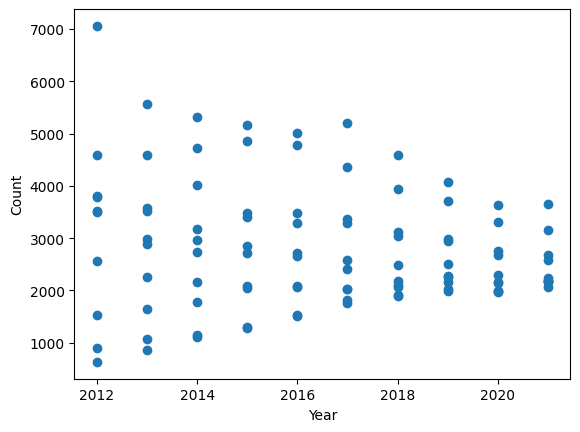

In [43]:
plt.scatter(plot_df['Year'],plot_df['Count'])
plt.xlabel('Year')
plt.ylabel('Count')

The above plot is not very meaningful without the names, instead we could use a seaborn plot and set the hue parameter to distinguish them.

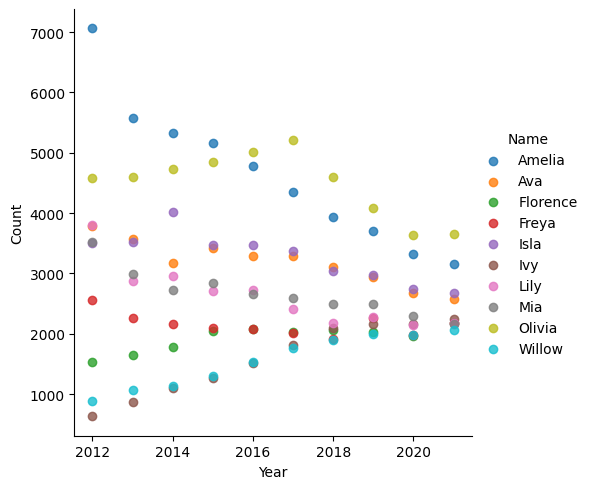

In [44]:
sns.lmplot(x='Year', y='Count', hue='Name', data=plot_df, fit_reg=False)

As much as I like a good scatter plot, it is not really helpful here to see any trends. A line plot would at least show if any names have gained/lost popularity.

[Text(0.5, 1.0, 'History of 2021 Top Girls Names')]

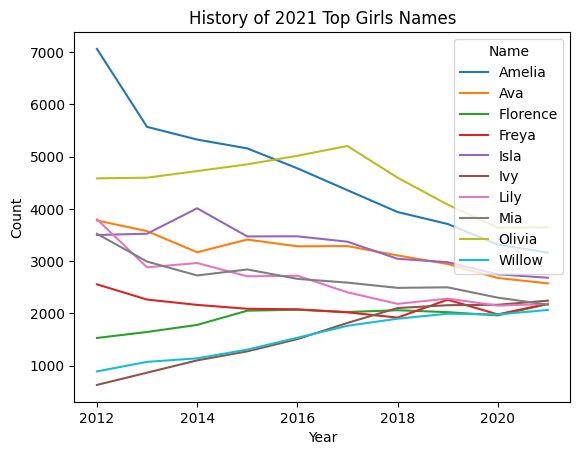

In [45]:
sns.lineplot(x='Year', y='Count', hue='Name', data=plot_df).set(title="History of 2021 Top Girls Names")

At last something a bit more meaningful, we can see the name Amelia has declined in popularity, whilst Willow has increased, Olivia peaked in 2017, but is also declining. 

This section is really showing examples of what not to do. Please do not submit plots that are as unreadable as the above scatter plots! Future tutorials will look at visualisations in more detail. 